<a href="https://colab.research.google.com/github/salmanromeo/CS_5683_Big_Data_Analytics/blob/main/Assignment_1_Dimensionality_Reduction_with_PCA_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Tasks**

**Dataset:** We will be using the text data generated by ChatGPT. Collect the data of your interest. Datasets used for this assignment should have a minimum of 5 types of instances, a minimum of 10 instances in each type, and a minimum of 50 words description in each instance.

**ChatGPT**

In [1]:
import csv
import random

# Generating random movie summaries
def generate_movie_summary(genre):
    summaries = {
        "Thriller": [
            "A detective uncovers a web of lies in a city consumed by crime.",
            "A lawyer faces a moral dilemma when defending a dangerous client.",
            "A secret agent is betrayed by his closest allies during a mission.",
            "A killer stalks a woman who is the key to a long-unsolved case.",
            "A doctor becomes obsessed with his patient, leading to deadly consequences.",
            "A journalist uncovers a government conspiracy while covering a political scandal.",
            "A family's cabin vacation turns into a fight for survival against mysterious attackers.",
            "A hacker is hunted after discovering a global surveillance program.",
            "An investigator races against time to stop a series of gruesome murders.",
            "A criminal mastermind plays a deadly game with a police officer."
        ],
        "Fantasy": [
            "A young wizard must save his realm from a dark sorcerer.",
            "A princess teams up with a rogue knight to reclaim her throne.",
            "A group of unlikely heroes embark on a quest to find a magical artifact.",
            "A dragon and a human form an unlikely alliance to prevent a war.",
            "An ancient prophecy foretells the rise of a new king.",
            "A cursed warrior must journey to the underworld to break his chains.",
            "A magical forest holds the key to an impending catastrophe.",
            "A young girl discovers she is the last of a powerful race of warriors.",
            "A hero must overcome their greatest fear to save the world from chaos.",
            "A sorceress battles evil forces that threaten to destroy her kingdom."
        ],
        "Sci-Fi": [
            "A scientist creates a machine that allows people to travel between dimensions.",
            "Earth is invaded by an alien race, and a group of survivors fight back.",
            "A crew on a spaceship discovers a terrifying secret while exploring deep space.",
            "A time traveler tries to prevent a devastating future war.",
            "A robot gains consciousness and questions the purpose of its existence.",
            "A dystopian society is overthrown by a group of rebels.",
            "A scientist's experiment to enhance human intelligence spirals out of control.",
            "A team of astronauts embarks on a mission to find a new habitable planet.",
            "A virus wipes out most of humanity, leaving a small group of survivors.",
            "A hacker must stop an AI from taking control of the world."
        ],
        "Romance": [
            "A woman falls in love with her childhood best friend after years apart.",
            "Two strangers meet on a train and form an instant connection.",
            "A young artist finds love while studying abroad.",
            "A CEO and a single mother unexpectedly fall for each other.",
            "A chance encounter leads to a whirlwind romance in a foreign city.",
            "A couple's long-distance relationship is tested by life's challenges.",
            "Two high school sweethearts reunite after years of separation.",
            "A man falls for a woman he meets at a charity event.",
            "A writer finds inspiration through a passionate love affair.",
            "A small-town baker falls for a visiting celebrity."
        ],
        "Comedy": [
            "A group of friends embark on a disastrous road trip across the country.",
            "A clumsy detective fumbles his way through solving a major case.",
            "A misfit group of office workers accidentally start a successful business.",
            "Two rival neighbors engage in a series of increasingly absurd pranks.",
            "A failing musician unexpectedly rises to fame through a bizarre accident.",
            "A man wakes up to find his entire life has become a reality show.",
            "A group of misfits must win a wacky competition to save their local diner.",
            "A wedding planner falls in love with one of her clients.",
            "Two best friends accidentally crash a high-society gala.",
            "A struggling actor pretends to be a celebrity to land a big role."
        ]
    }

    return random.sample(summaries[genre], 10)

# Define genres
genres = ["Thriller", "Fantasy", "Sci-Fi", "Romance", "Comedy"]

# Create list to hold the movie summaries
movies = []

# Generate summaries for each genre
for genre in genres:
    summaries = generate_movie_summary(genre)
    for summary in summaries:
        movies.append([genre, summary])

# Save to CSV file
file_path = '/content/sample_data/random_movie_summaries.csv'
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Genre", "Movie Description"])
    writer.writerows(movies)

**Task - 1 (20 Points): Read the text data and text pre-processing**

1.  Read the text data using corresponding Python 3.0 packages. For example, if we store the data using .csv, we use a package called Pandas.





In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = '/content/sample_data/random_movie_summaries.csv'
movie_summaries_df = pd.read_csv(file_path)

2.  We are interested only in the description of the generated text data. Students are suggested to store the dataset in such a way that it is easy to read only the text description. For example, store the movie title in one column and the movie description in one column in the .csv file.

In [5]:
# Display the first few rows of the DataFrame
movie_summaries_df.head()

,Genre,Movie Description
0,Thriller,A detective uncovers a web of lies in a city c...
1,Thriller,A hacker is hunted after discovering a global ...
2,Thriller,A killer stalks a woman who is the key to a lo...
3,Thriller,A criminal mastermind plays a deadly game with...
4,Thriller,A journalist uncovers a government conspiracy ...


3.   Extract TF-IDF features of the text description using the TfidfVectorizer function from the sklearn package in Python. TfidfVectorizer automates the process of extracting TF-IDF features of the given text data. NOTE: TfidfVectorizer offers functions to extract column names (tokens) after extracting the features. Also, it is good to know the other functionalities of sklearn.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the movie descriptions from the DataFrame
text_data = movie_summaries_df['Movie Description']

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()  # max_features=1000

# Fit and transform the text data to extract TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

# Access the tokens (feature names)
tokens = tfidf_vectorizer.get_feature_names_out()
print("Tokens (feature names):", tokens)

   abroad  absurd  accident  accidentally  across  actor  affair     after  \
0     0.0     0.0       0.0           0.0     0.0    0.0     0.0  0.000000   
1     0.0     0.0       0.0           0.0     0.0    0.0     0.0  0.316828   
2     0.0     0.0       0.0           0.0     0.0    0.0     0.0  0.000000   
3     0.0     0.0       0.0           0.0     0.0    0.0     0.0  0.000000   
4     0.0     0.0       0.0           0.0     0.0    0.0     0.0  0.000000   

   against  agent  ...  win  wipes      with  wizard     woman  workers  \
0      0.0    0.0  ...  0.0    0.0  0.000000     0.0  0.000000      0.0   
1      0.0    0.0  ...  0.0    0.0  0.000000     0.0  0.000000      0.0   
2      0.0    0.0  ...  0.0    0.0  0.000000     0.0  0.292118      0.0   
3      0.0    0.0  ...  0.0    0.0  0.272944     0.0  0.000000      0.0   
4      0.0    0.0  ...  0.0    0.0  0.000000     0.0  0.000000      0.0   

   world  writer  years  young  
0    0.0     0.0    0.0    0.0  
1    0.0     0

4.   Standardize the TF-IDF features using
\begin{align}
        \tilde{x_i} = \frac{x_i - \mu_i}{\sigma_i}
    \end{align}
where $x_i$ is the ith point of feature $x$, $mu_i$ is the mean of feature $x$, and $\sigma_i$ is the standard deviation of feature $x$.

In [7]:
# Standardize the TF-IDF features using the given formula
standardized_tfidf_df = (tfidf_df - tfidf_df.mean()) / tfidf_df.std()

# Display the standardized TF-IDF DataFrame
print(standardized_tfidf_df.head())

     abroad    absurd  accident  accidentally    across     actor    affair  \
0 -0.141421 -0.141421 -0.141421     -0.201992 -0.141421 -0.141421 -0.141421   
1 -0.141421 -0.141421 -0.141421     -0.201992 -0.141421 -0.141421 -0.141421   
2 -0.141421 -0.141421 -0.141421     -0.201992 -0.141421 -0.141421 -0.141421   
3 -0.141421 -0.141421 -0.141421     -0.201992 -0.141421 -0.141421 -0.141421   
4 -0.141421 -0.141421 -0.141421     -0.201992 -0.141421 -0.141421 -0.141421   

      after   against     agent  ...       win     wipes      with    wizard  \
0 -0.249698 -0.201729 -0.141421  ... -0.141421 -0.141421 -0.329688 -0.141421   
1  4.104627 -0.201729 -0.141421  ... -0.141421 -0.141421 -0.329688 -0.141421   
2 -0.249698 -0.201729 -0.141421  ... -0.141421 -0.141421 -0.329688 -0.141421   
3 -0.249698 -0.201729 -0.141421  ... -0.141421 -0.141421  3.087486 -0.141421   
4 -0.249698 -0.201729 -0.141421  ... -0.141421 -0.141421 -0.329688 -0.141421   

      woman   workers     world    writer   

**Task - 2 (20 Points): Implement PCA**


1.   We will not extract Eigen Values and Eigen Vectors for this assignment. Instead, we will use the Python package to perform PCA. This assignment will utilize PCA function available in the sklearn package. Do not reduce the number of features in this step.



In [8]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the TF-IDF data
tfidf_pca = pca.fit_transform(standardized_tfidf_df) # tfidf_pca = pca.fit(tfidf_df)

# Create a DataFrame to store the PCA-transformed features
pca_df = pd.DataFrame(tfidf_pca, columns=[f'PC{i+1}' for i in range(tfidf_pca.shape[1])])

# Print the first few rows of the PCA-transformed DataFrame
print(pca_df.head())

# Explore PCA attributes
print("PCA Components (Eigenvectors):", pca.components_)
print("Explained Variance:", pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Mean of each feature:", pca.mean_)
print("Singular Values:", pca.singular_values_)
print("Number of components:", pca.n_components_)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.031194 -0.927012 -2.638551 -0.025875 -2.455874 -0.291740  2.308429   
1 -0.086596  0.070291 -1.186351 -0.173523 -1.429837 -0.300827  1.123086   
2 -0.771810 -0.192025 -0.364223 -1.840666  0.822526  0.108410  0.267591   
3 -0.496118 -3.281312  0.259064 -1.728986 -3.374432 -0.854942  1.333353   
4 -0.004135 -0.970654 -2.210452 -0.039900 -1.254527  2.747920  4.397348   

        PC8       PC9      PC10  ...      PC41      PC42      PC43      PC44  \
0  0.590775 -2.791775  4.430894  ...  6.919193 -1.039770 -0.845391  1.004968   
1 -0.954658 -2.060038  0.473141  ...  0.590615  0.612834  0.451517 -0.637447   
2  0.730682 -5.200921  0.893517  ...  6.655942 -2.332746  1.484532  3.507599   
3  0.265552  2.753625 -3.944557  ...  0.183437 -0.300446 -0.027097  0.112147   
4  2.795750  0.357596  1.787583  ... -2.384424 -0.025445  0.167771 -0.349815   

       PC45      PC46      PC47      PC48      PC49          PC50  



2.   Visualize the explained_variance_ratio_ attribute of each component after fitting PCA using a bar plot. This attribute captures what proportion of information is captured by each component in the given text data. The bar plot must include plot title, x-axis title, and y-axis title. Students can use matplotlib or seaborn packages for data visualizations.



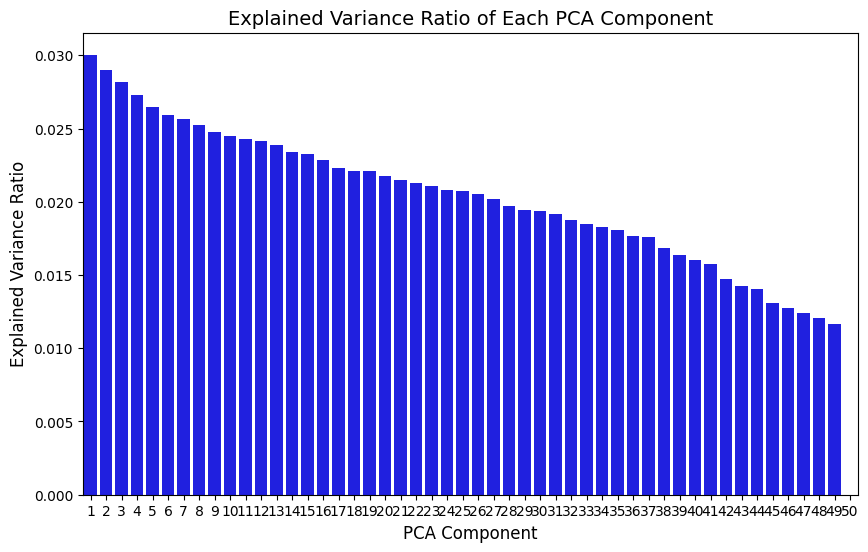

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(range(1, len(explained_variance_ratio) + 1)), y=explained_variance_ratio, color="b")
plt.title('Explained Variance Ratio of Each PCA Component', fontsize=14)
plt.xlabel('PCA Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.show()


3.   Implement another PCA function to select only 'k' components. Give your reasoning on the choice of 'k' that aligns with the bar plot.



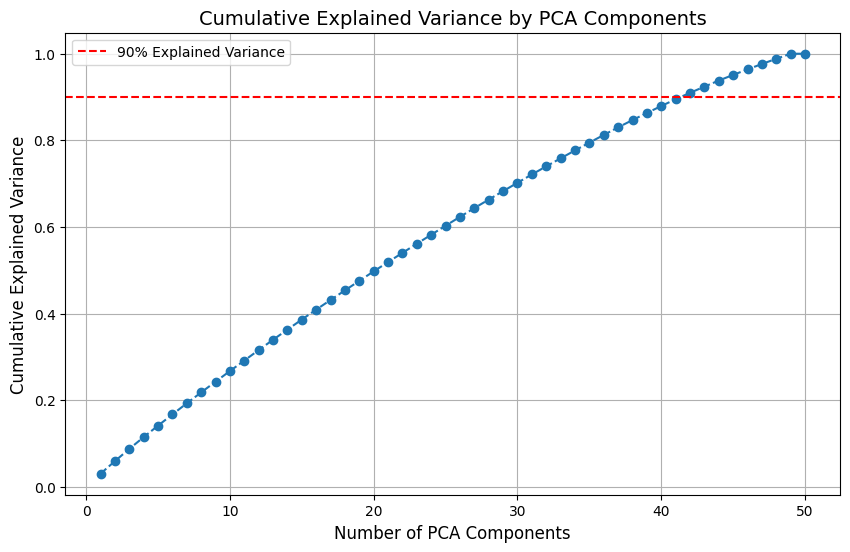

Number of components selected (k) to explain 90% of variance: 42


In [10]:
# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance to justify choice of k
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.show()

# Select the number of components 'k' that explains 90% of the variance
k = next(i for i, total_variance in enumerate(cumulative_explained_variance) if total_variance >= 0.90) + 1

print(f"Number of components selected (k) to explain 90% of variance: {k}")


*   From the graph, we can observe that approximately $42$ components are needed to explain $90\%$ of the variance. This value of $k=42$ is appropriate because it balances capturing most of the data's variance while reducing dimensionality.
*   However, there is no sharp incline typically associated with a clear inflection point where the variance explained flattens out significantly. This absence of a sharp bend indicates that the variance is distributed more evenly across the components, without a few components explaining most of the variance.

*   Reasons of this can be that the data does not have a few dominant features that explain a large portion of the variance. Instead, the variance is spread more evenly across all components, which is why there's a gradual, linear increase in the explained variance rather than a sharp bend.
*   Text data like this often consists of many small but relevant features spread across numerous dimensions, making it difficult to capture most of the variance in a few components. Each word or token contributes a small piece of the total variance, hence the slow rise in explained variance.

*   Therefore, the data does not show a clear clustering structure. Additional domain knowledge or context may be necessary to uncover more insights.







**Task - 3 (20 Points): Projection and Reconstruction**


1.   Project the TF-IDF features in a reduced number of 'k' features.



In [11]:
# Reinitialize PCA with 'k' components that explains 90% of the variance
pca_k = PCA(n_components=k)

# Fit PCA with 'k' components
pca_k.fit(tfidf_df)

# Transform the data to 'k' components
tfidf_reduced = pca_k.transform(tfidf_df)

# Show transformed data shape
print(f"Shape of reduced data: {tfidf_reduced.shape}")

# Convert the reduced data to a DataFrame for easier analysis
reduced_columns = [f'PC{i+1}' for i in range(k)]
tfidf_reduced_df = pd.DataFrame(tfidf_reduced, columns=reduced_columns)

# Display the first few rows of the reduced data
print(tfidf_reduced_df.head())

Shape of reduced data: (50, 42)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.087692  0.214458 -0.119023  0.077450 -0.071649  0.016965 -0.141612   
1  0.038544  0.112152 -0.153561  0.049256  0.080073 -0.200305 -0.227117   
2 -0.045372 -0.068270 -0.103582  0.242267 -0.024713 -0.273587 -0.167575   
3  0.208806 -0.070727 -0.001873 -0.002788 -0.153528  0.002546 -0.053907   
4  0.109407  0.023515 -0.056198  0.104469  0.186480  0.269058 -0.001125   

        PC8       PC9      PC10  ...      PC33      PC34      PC35      PC36  \
0 -0.397741 -0.199846 -0.302415  ...  0.120022  0.094553  0.069615 -0.174918   
1  0.136578  0.030442  0.063954  ... -0.181961 -0.138235 -0.088967 -0.042746   
2  0.108485  0.334527 -0.273759  ... -0.062043 -0.150407  0.054757  0.241855   
3  0.010909  0.045378  0.431678  ...  0.169409 -0.135445 -0.093643 -0.190684   
4 -0.112117 -0.079259 -0.095993  ... -0.025436 -0.020634 -0.105468  0.135498   

       PC37      PC38      PC39     


2.   Reconstruct the original data from the projections. Both projection and reconstruction can be done with PCA package in Python.



In [12]:
from sklearn.metrics import mean_squared_error

# Range of k values to test
k_values = range(1, min(tfidf_df.shape[1], 50))
reconstruction_losses = []

for k in k_values:
    # Initialize PCA with 'k' components
    pca = PCA(n_components=k)

    # Project the TF-IDF features to 'k' components
    tfidf_projected = pca.fit_transform(tfidf_df)

    # Reconstruct the original TF-IDF features from the 'k' components
    tfidf_reconstructed = pca.inverse_transform(tfidf_projected)

    # Calculate the reconstruction loss using Mean Squared Error
    loss = mean_squared_error(tfidf_df, tfidf_reconstructed)
    reconstruction_losses.append(loss)


3.   Calculate reconstruction loss with Mean Squared Error between the original TF-IDF features and reconstructed features.

4.   Generate a line plot for the reconstruction loss by varying 'k'. Check if your previous reasoning in Task - 2 for the choice of 'k' is still valid with reconstruction loss plot.




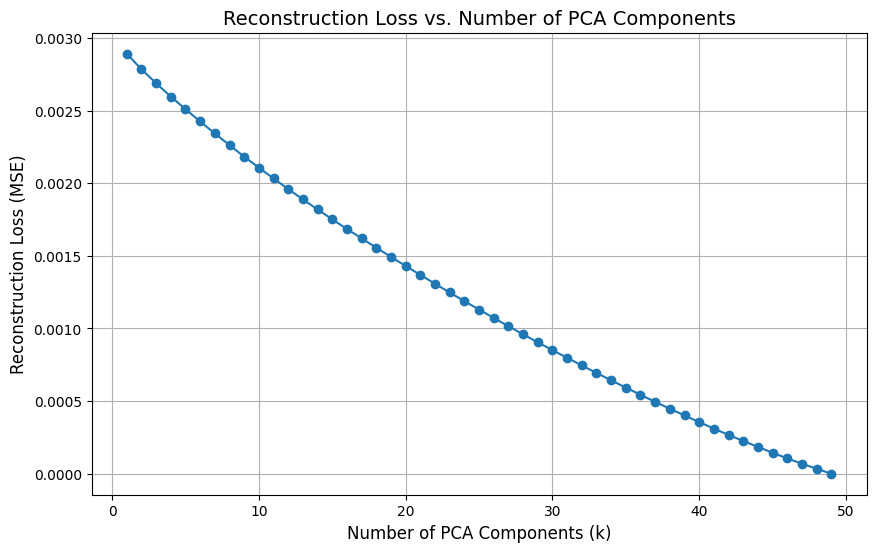

Number of components: 1, Reconstruction Loss (MSE): 0.0029
Number of components: 2, Reconstruction Loss (MSE): 0.0028
Number of components: 3, Reconstruction Loss (MSE): 0.0027
Number of components: 4, Reconstruction Loss (MSE): 0.0026
Number of components: 5, Reconstruction Loss (MSE): 0.0025
Number of components: 6, Reconstruction Loss (MSE): 0.0024
Number of components: 7, Reconstruction Loss (MSE): 0.0023
Number of components: 8, Reconstruction Loss (MSE): 0.0023
Number of components: 9, Reconstruction Loss (MSE): 0.0022
Number of components: 10, Reconstruction Loss (MSE): 0.0021
Number of components: 11, Reconstruction Loss (MSE): 0.0020
Number of components: 12, Reconstruction Loss (MSE): 0.0020
Number of components: 13, Reconstruction Loss (MSE): 0.0019
Number of components: 14, Reconstruction Loss (MSE): 0.0018
Number of components: 15, Reconstruction Loss (MSE): 0.0018
Number of components: 16, Reconstruction Loss (MSE): 0.0017
Number of components: 17, Reconstruction Loss (MS

In [13]:
# Plot the reconstruction loss
plt.figure(figsize=(10,6))
plt.plot(k_values, reconstruction_losses, marker='o', linestyle='-')
plt.title('Reconstruction Loss vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components (k)', fontsize=12)
plt.ylabel('Reconstruction Loss (MSE)', fontsize=12)
plt.grid(True)
plt.show()

# Print the reconstruction losses for review
for k, loss in zip(k_values, reconstruction_losses):
    print(f'Number of components: {k}, Reconstruction Loss (MSE): {loss:.4f}')

Therefore, mean Squared Error between the original TF-IDF features and reconstructed features for $k=42$ is $0.0003$. Moreover, the reconstruction loss is significantly low and decreasing steadily, so, it supports that $k=42$ that explains $90\%$ of the variance is a good choice.

**Task - 4 (15 Points): Interpretation of results**



1.   Analyze the effects of standardization and de-standardization steps in PCA results.





*   In the **standardized_tfidf_df** DataFrame, each feature is scaled to have a mean close to $0$ and a standard deviation close to $1$. This normalization step guarantees that all features contribute equally to the principal components.
*   Using the pca.**inverse_transform**(tfidf_projected) method allows us to project the principal components back into the original feature space. This process generates a DataFrame that resembles the original tfidf_df, but the values will not be identical due to the dimensionality reduction and subsequent reconstruction.




2.   Explain how your choice of 'k' affects in balancing both retaining information and reducing dimensionality.





*   Higher values of 'k' capture more of the variance in the data, resulting in a less reduced dimensionality and a larger feature space. This can lead to higher computational costs and an increased risk of overfitting. Additionally, it may not effectively eliminate noise or irrelevant information.
*   lower values of 'k' simplify the dataset by reducing dimensionality, making it more manageable and leading to faster computations, particularly on high-dimensional data. It also reduces the risk of overfitting by concentrating on the most significant patterns. However, using a smaller 'k' may capture less variance, potentially leading to a loss of important information.




3.   Extract top 'k' terms associated with your final choice of 'k'. Explain how these terms contribute to the underlying structure of the given original text data.




*   We calculate the cumulative explained variance ratio for each 'k' and decide on a threshold. This allows us to choose 'k' such that it retains most of the information while still reducing dimensionality.
*   Howerver, **Cumulative Explained Variance by PCA Components** plot from Task - 2 (3) indicate that the data does not have a few dominant features that explain a large portion of the variance. Each word or token contributes a small piece of the total variance, hence the slow rise in explained variance. Therefore, the data does not show a clear clustering structure.

*   From my understanding, for classification or regression problems, choosing a value of 'k' that explains $90\%$ of the variance is a good trade-off between retaining information and reducing dimensionality. In this case, the Mean Squared Error (MSE) between the original TF-IDF features and the reconstructed features for $k=42$ is $0.0003$, which indicates a good balance between dimensionality reduction and information preservation.




